In [1]:
library(data.table)
library(forecast)
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
filename = "/Volumes/data/projects/django-mms/data/demand_daily/luzon-hourly-demand.csv"

In [3]:
dt = fread(filename,sep=",")

In [4]:
head(dt)

TIME_INTERVAL,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-06-26 00:00:00,7763.500,320.0000,0,138.0200,8147.067,74.45909,0
2021-06-26 01:00:00,7887.279,466.6667,0,147.4142,8401.715,99.62167,0
2021-06-26 02:00:00,7527.432,480.0000,0,139.3717,7996.198,150.60667,0
2021-06-26 03:00:00,7326.856,480.0000,0,131.8258,7722.851,215.86000,0
2021-06-26 04:00:00,7104.273,480.0000,0,121.6275,7492.467,213.44250,0
2021-06-26 05:00:00,6941.924,480.0000,0,115.4933,7348.954,188.46833,0


In [5]:
n_date <- unique(dt[, TIME_INTERVAL])
length(n_date)

[1] 1201

In [6]:
dt_train <- dt[TIME_INTERVAL %in% n_date[1:1000]]
dt_test <- dt[TIME_INTERVAL %in% n_date[1001:1201]]
head(dt_test)

TIME_INTERVAL,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-08-06 16:00:00,9159.344,0,0,134.9275,9299.358,0.00000000,5.123333
2021-08-06 17:00:00,8681.993,0,0,120.0200,8827.621,0.02166667,25.593333
2021-08-06 18:00:00,8675.513,0,0,124.0275,8859.455,0.00000000,59.943333
2021-08-06 19:00:00,8907.350,0,0,131.9883,9071.607,0.00000000,32.282500
2021-08-06 20:00:00,8963.976,0,0,136.3025,9121.383,0.00000000,21.055833
2021-08-06 21:00:00,9022.061,0,0,142.3233,9158.010,8.20333333,1.846667


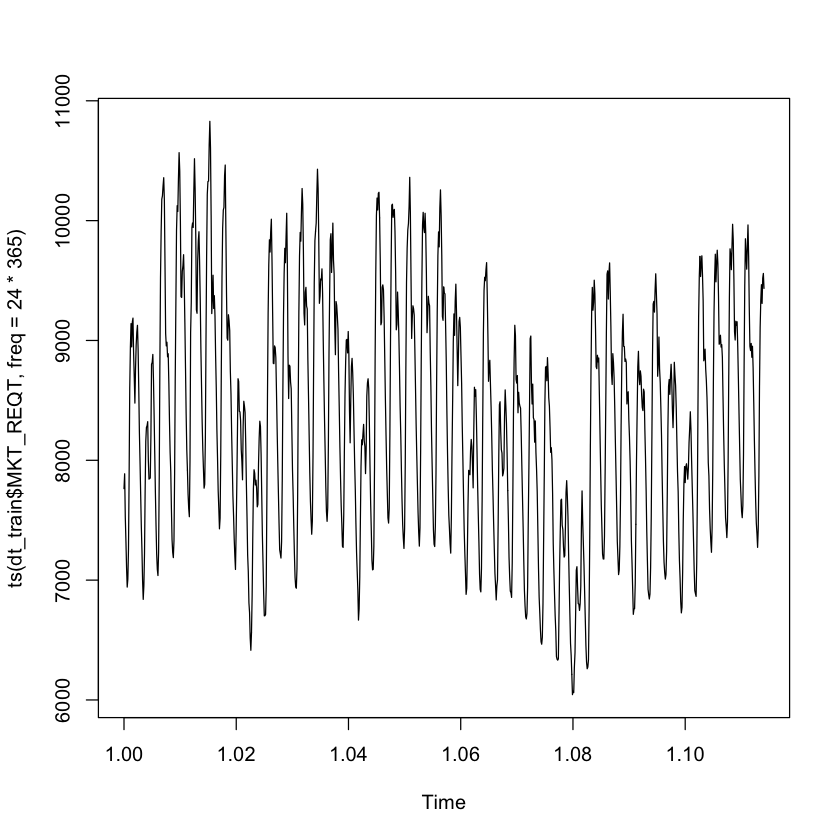

In [7]:
plot(ts(dt_train$MKT_REQT, freq = 24*365))

In [8]:
data_ts <- ts(dt_train$MKT_REQT, freq = 24*7)

decomp_ts <- stl(data_ts, s.window = "periodic", robust = TRUE)$time.series
 

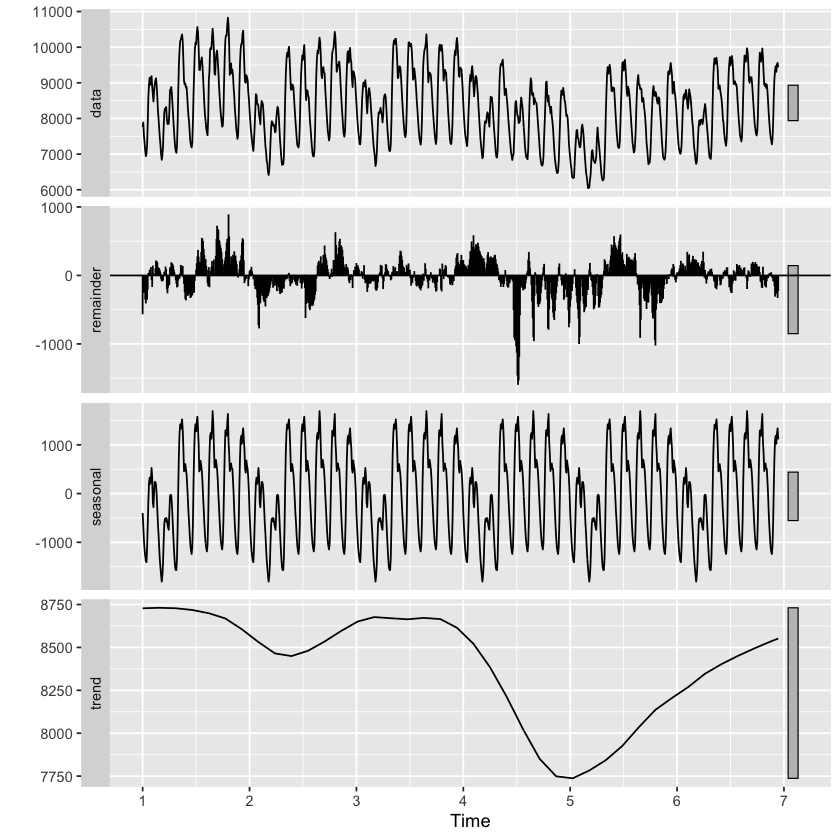

In [9]:
autoplot(stl(data_ts, s.window = "periodic", robust = TRUE))